# Advanced methods with `nltk`

## Lecture goals

- **Sentiment analysis** with `nltk`.  
- Accessing **corpora** with `nltk`. 

In [11]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sentiment analysis

> `nltk` has a number of tools for **sentiment analysis**, which are both *efficient* and *fairly accurate*.

We'll focus on the `SentimentIntensityAnalyzer`.

### Refresher: what is sentiment analysis?

> [**Sentiment analysis**](https://en.wikipedia.org/wiki/Sentiment_analysis) refers to the process of extracting or inferring "sentiment" (i.e., *affect*) from language data.

- Before, we adopted a fairly simple approach.  
  - Split sentence into words ("tokenize").  
  - Search for *positive* and *negative* words in sentence.  
  - Calculate *weighted average* of words in sentence.  

What were some of the *problems* with this **bag-of-words** approach?

### Problems with naive approach

- Doesn't account for *graded* nature of sentiment ("good" vs. "great"). 
- Doesn't account for *context* ("great" vs. "not great").
- Misses importance of *emphasis* ("AMAZING!!!" vs. "amazing"). 
- Misses importance of *conjunctions* ("good, but pretty expensive").

### The `SentimentIntensityAnalyzer`

> The [`SentimentIntensityAnalyzer`](https://www.nltk.org/api/nltk.sentiment.vader.html) is an implementation of a [2014 paper](https://ojs.aaai.org/index.php/icwsm/article/view/14550) introducing a **parsimonious, rule-based sentiment analysis tool**.

"VADER" = Valence-Aware Dictionary for sEntiment Reasoning.

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/olimpiacarrioli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
### Import

### How it works

- Authors studied how *humans* determine sentiment of social media posts.  
- Identified several *mechanisms* beyond the individual words in the post.
   - **Punctuation** ("!!" vs. ".").  
   - **Capitalization** ("GREAT" vs. "great").  
   - **Intensifiers** ("very good" vs. "good"). 
   - **Contrastive conjunctions** ("but", "although", "however"). 
   - **Negation** ("not great").
- Implemented a simple **rule-based parser**. 

### Success!

- The authors found that this approach worked pretty well!

> The  Pearson  Product  Moment Correlation  Coefficient  shows  that VADER  (**r  =  0.881**) performs as  well  as individual human raters (**r  =  0.888**) at matching  ground  truth  (aggregated  group  mean  from  20 human  raters  for  sentiment  intensity  of  each  tweet).

- VADER out-performed **bag-of-words models**.  
- Surprisingly, approaches using machine learning *did not outperform VADER* (at the time).  
- Remains a simple, flexible approach. 

### `SentimentIntensityAnalyzer` in action

- The main function you'll be using is `polarity_scores(text)`.  
- `return`s a dictionary with information about `neg`, `neu`, and `pos` sentiment.  
  - Also includes `compound` sentiment: weighted average.

In [14]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text="I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

#### Check-in

Try out the `SentimentIntensityAnalyzer` for some of the sentences below. 

- How does it compare to the bag-of-words approach we used?  
- Try writing other sentences and seeing how it does with them as well.

In [15]:
sentences = [
    'This meal was so great!',
    'This meal was not great!',
    'I liked the movie, but the acting was poor.'
]
for text in sentences:
    scores = sia.polarity_scores(text)
    print (text)
    print ('Compound sentiment: {c}\n'.format(c=scores['compound']))

This meal was so great!
Compound sentiment: 0.7603

This meal was not great!
Compound sentiment: -0.5553

I liked the movie, but the acting was poor.
Compound sentiment: -0.5023



#### VADER > bag-of-words

In [16]:
for sent in sentences:
    scores = sia.polarity_scores(sent)
    print(sent)
    print("Compound sentiment: {c}\n".format(c = scores['compound']))

This meal was so great!
Compound sentiment: 0.7603

This meal was not great!
Compound sentiment: -0.5553

I liked the movie, but the acting was poor.
Compound sentiment: -0.5023



#### Check-in: where does VADER fail?

Can you come up with some examples on which *your interpretation* of the sentence's sentiment would differ from VADER's? What do you think is going on with these examples?

In [17]:
sia.polarity_scores('that movie is so sick')

{'neg': 0.515, 'neu': 0.485, 'pos': 0.0, 'compound': -0.6418}

### `SentimentIntensityAnalyzer` isn't perfect

Plenty of cases where VADER diverges from our intuition.  

1. Implied **sarcasm**.  
2. Cultural **idioms** ("not my cup of tea"). 

We could maybe address (2) with *expanded lexicon*, but (1) is much harder.
   

In [18]:
### Sarcasm
sia.polarity_scores("Great, another Powerpoint presentation...")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [19]:
### Cultural specificity
sia.polarity_scores("That movie wasn't my cup of tea")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Sentiment analysis in the age of LLMs

- Nowadays, it's more common to use **language models** for sentiment analysis.  
- A **large language model (LLM)** is trained to do next-word prediction on a bunch (billions!) of words.  
- Over time, these LLMs learn useful **representations** about language.  
   - We can then **fine-tune** them to predict `pos`/`neg` from these implicit representations.
- Less need to build explicit *lexicon* or *rules*.
   - Though these are also black boxes!
   
We'll discuss LLMs more towards the end of the quarter.

## Corpora

> `nltk` also contains a number of *corpora* (language data) and *knowledge bases* (structured representations of language, e.g., `WordNet`). 

- **Corpora**: useful for *evaluating* NLP algorithms, studying language use, etc.  
- **Knowledge base**: useful for *augmenting* NLP tools.

We'll focus on *corpora*; an NLP-specific course could discuss knowledge bases in more detail.

### A quick look at *corpora* in `nltk`

> The [`nltk.corpus` package](https://www.nltk.org/api/nltk.corpus.html) has a number of available *corpora*, including grammars, books, and more.

- `nltk.corpus.gutenberg`: select texts from [Project Gutenberg](https://www.gutenberg.org/).
- `nltk.corpus.brown`: corpus (1M words) of news, editorials, and more.  
- `nltk.corpus.reuters`: ~10K news articles with *categories* (e.g., "trade").  
- `nltk.corpus.reviews`: movie reviews labeled with *sentiment*.  
- `nltk.corpus.inaugural`: a collection of presidential inaugural addresses.

### Zooming in: `gutenberg`

In [20]:
### must first *download*
nltk.download('gutenberg')
### import
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/olimpiacarrioli/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [21]:
### Sample files
gutenberg.fileids()[0:5]

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt']

#### Using `gutenberg`

Given a `fileid`, `gutenberg` can load the *tokenized words* for that text.  

```python
gutenberg.words(FILEID_HERE)
```

Or the *tokenized sentences*:

```python
gutenberg.sents(FILEID_HERE)
```

In [29]:
emma = gutenberg.sents("austen-emma.txt") ## already tokenized! 
emma

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [30]:
emma[10] # tokenized by sentences and then by words

['The',
 'danger',
 ',',
 'however',
 ',',
 'was',
 'at',
 'present',
 'so',
 'unperceived',
 ',',
 'that',
 'they',
 'did',
 'not',
 'by',
 'any',
 'means',
 'rank',
 'as',
 'misfortunes',
 'with',
 'her',
 '.']

In [12]:
len(emma) ### number of sentences

7752

In [28]:
emma_w = gutenberg.words("austen-emma.txt") ## already tokenized -- into words already. so every item is a word
emma_w[188]

'Miss'

#### Check-in

Use the `SentimentIntensityAnalyzer` for each *sentence* in *Emma*. Then plot the trajectory of sentiment over the book in terms of sentences. 

**Note**: You may need to first `.join` each sentence, since they're represented as lists of words.

In [36]:
sia = SentimentIntensityAnalyzer()

string = [' '.join(sent) for sent in emma]
df_sentences = pd.DataFrame({'sentence': string})
df_sentences['sentiment'] = df_sentences['sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

df_sentences

,sentence,sentiment
0,[ Emma by Jane Austen 1816 ],0.0000
1,VOLUME I,0.0000
2,CHAPTER I,0.0000
3,"Emma Woodhouse , handsome , clever , and rich ...",0.9687
4,She was the youngest of the two daughters of a...,0.4927
...,...,...
7747,"While either of them protected him and his , H...",0.4404
7748,"The result of this distress was , that , with ...",0.6643
7749,The wedding was very much like other weddings ...,-0.5423
7750,"-- But , in spite of these deficiencies , the ...",0.9757


<Axes: xlabel='sentiment', ylabel='Count'>

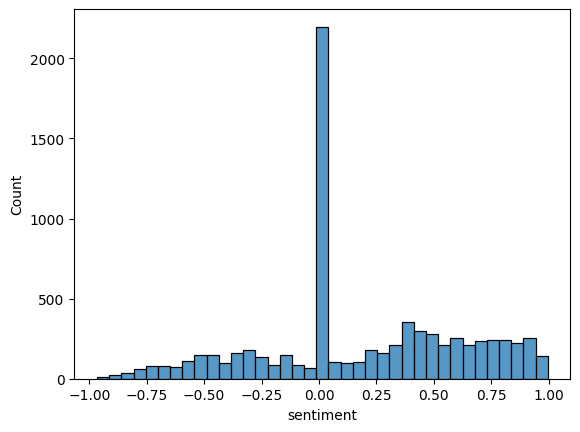

In [37]:
sns.histplot(data = df_sentences, x='sentiment')
## most sentences have zero sentiment

#### Step 1: get sentiment

In [14]:
joined_sentences = [' '.join(s) for s in emma]
df_sentences = pd.DataFrame({'sentence': joined_sentences})
df_sentences['sentiment'] = df_sentences['sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [15]:
df_sentences.head(5)

,sentence,sentiment
0,[ Emma by Jane Austen 1816 ],0.0000
1,VOLUME I,0.0000
2,CHAPTER I,0.0000
3,"Emma Woodhouse , handsome , clever , and rich ...",0.9687
4,She was the youngest of the two daughters of a...,0.4927


#### Step 2: moving average

Let's create a *moving average* over 500 sentences. (Feel free to try changing the window size!)

In [38]:
df_sentences['sentiment_smoothed'] = df_sentences['sentiment'].rolling(window=500, 
                                                                       min_periods=1).mean()
df_sentences.head(5)
## rolling average = you average across 500 data points, then move by 1 data point

,sentence,sentiment,sentiment_smoothed
0,[ Emma by Jane Austen 1816 ],0.0000,0.000000
1,VOLUME I,0.0000,0.000000
2,CHAPTER I,0.0000,0.000000
3,"Emma Woodhouse , handsome , clever , and rich ...",0.9687,0.242175
4,She was the youngest of the two daughters of a...,0.4927,0.292280


#### Step 3: plot!

<Axes: xlabel='sentiment_smoothed', ylabel='Count'>

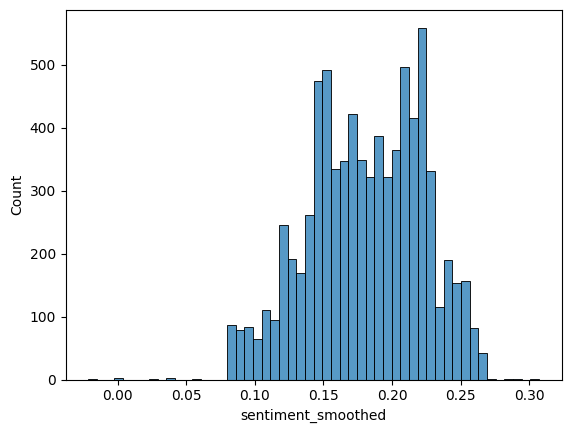

In [40]:
sns.histplot(data = df_sentences,
             x = 'sentiment_smoothed')

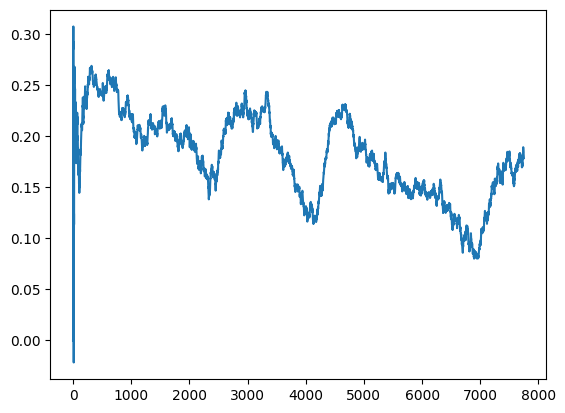

In [39]:
plt.plot(df_sentences['sentiment_smoothed']) ## x val is the index of that data point, y value is the actual value

#### Check-in

Now do the same thing for `shakespeare-hamlet.txt`. Does it match your intuitions?

In [50]:
hamlet = gutenberg.sents('shakespeare-hamlet.txt')
joined_sents = [' '.join(s) for s in hamlet]
df_hamlet = pd.DataFrame({'sentence': joined_sents})
df_hamlet['sentiment'] = df_hamlet['sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_hamlet['smoothed'] = df_hamlet['sentiment'].rolling(window=500, min_periods=1).mean()
df_hamlet

,sentence,sentiment,smoothed
0,[ The Tragedie of Hamlet by William Shakespear...,0.0,0.000000
1,Actus Primus .,0.0,0.000000
2,Scoena Prima .,0.0,0.000000
3,Enter Barnardo and Francisco two Centinels .,0.0,0.000000
4,Barnardo .,0.0,0.000000
...,...,...,...
3101,"Go , bid the Souldiers shoote .",0.0,0.012883
3102,Exeunt .,0.0,0.012883
3103,"Marching : after the which , a Peale of Ordena...",0.0,0.014180
3104,FINIS .,0.0,0.014180


#### Analyzing *Hamlet*

In [51]:
hamlet_sentences = gutenberg.sents("shakespeare-hamlet.txt")
joined_sentences = [' '.join(s) for s in hamlet_sentences]
df_sentences = pd.DataFrame({'sentence': joined_sentences})
df_sentences['sentiment'] = df_sentences['sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_sentences['sentiment_smoothed'] = df_sentences['sentiment'].rolling(window=500, 
                                                                       min_periods=1).mean()
df_sentences.head(5)

,sentence,sentiment,sentiment_smoothed
0,[ The Tragedie of Hamlet by William Shakespear...,0.0,0.0
1,Actus Primus .,0.0,0.0
2,Scoena Prima .,0.0,0.0
3,Enter Barnardo and Francisco two Centinels .,0.0,0.0
4,Barnardo .,0.0,0.0


Text(0, 0.5, 'Sentiment (moving average)')

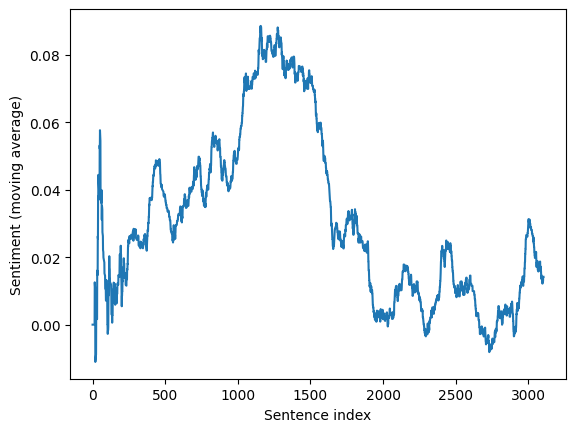

In [52]:
plt.plot(df_sentences['sentiment_smoothed'])
plt.xlabel("Sentence index")
plt.ylabel("Sentiment (moving average)")

### Exploring corpora

- `nltk` has many other *corpora*, including movie reviews, news articles, and more.  
- We'll revisit some of those throughout the class.  
- I encourage you to explore them yourself as well!

## Lecture wrap-up

- `nltk` is a powerful package with lots to offer.  
- Despite LLM advances, the `SentimentIntensityAnalyzer` remains a useful, efficient tool for **sentiment analysis**.  
- `nltk` also contains a number of useful corpora for textual analysis.